We start off by importing all the required libraries that we will need to process this dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

we then read the dataset csv file into a pandas DataFrame

In [4]:
df = pd.read_csv('train.csv')
print(df.dtypes)
print('\n',df.shape)
df.head()

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

 (8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


after an initial glance at the data provided there are already a few things that we plan to do.

Firstly, we will change the cryosleep and vip to a binary result to ease the processing and limit miss interpretation for the machine learning model.

Secondly, we am thinking of deleting the names as they serve no true purpose for this data.

thirdly, we want to split the cabin feature into 3 features, one being deck, second is the number, and third is the side (which we will turn into a binary since there are only 2 sides)

Finally, we will label encode the home planets and destinations to make the machine learning model to understand it clearer.

All of these steps will lead to cleaner data visualizations and a more accurate model at the end.

But before proceed with any of the following steps we must first further understand the data and the relations between the features.

In [5]:
nl  = df.isnull().sum()
nl[nl>0]

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64

After finding many null values in the data we must first remove them in order to clearly visualize the data

To solve the null values in RoomService FoodCourt, ShoppingMall, Spa, and VRDeck I will replace them with Zeros in order to not affect the visualization and not to confuse the machine learning model

In [6]:
df['RoomService'] = df['RoomService'].fillna(0)
df['ShoppingMall'] = df['ShoppingMall'].fillna(0)
df['Spa'] = df['Spa'].fillna(0)
df['FoodCourt'] = df['FoodCourt'].fillna(0)
df['VRDeck'] = df['VRDeck'].fillna(0)
nl  = df.isnull().sum()
nl[nl>0]

HomePlanet     201
CryoSleep      217
Cabin          199
Destination    182
Age            179
VIP            203
Name           200
dtype: int64

In [7]:
# df['RoomService'] = df['RoomService'].fillna(df['RoomService'].mean())
# df['ShoppingMall'] = df['ShoppingMall'].fillna(df['ShoppingMall'].mean())
# df['Spa'] = df['Spa'].fillna(df['Spa'].mean())
# df['FoodCourt'] = df['FoodCourt'].fillna(df['FoodCourt'].mean())
# df['VRDeck'] = df['VRDeck'].fillna(df['VRDeck'].mean())
# nl  = df.isnull().sum()
# nl[nl>0]

we compared the machine learning algorithms's accuracy between using mean and Zeros and the accuracy was higher with the Zero fills

To solve the Null Values in CryoSleep, and VIP I will set all True values to 1 and other values to 0

In [8]:
df['CryoSleep'] = df['CryoSleep'].astype(str)
df['CryoSleep'] = df['CryoSleep'].map(lambda x: 1 if x=='True' else 0)

In [9]:
df['VIP'] = df['VIP'].astype(str)
df['VIP'] = df['VIP'].map(lambda x: 1 if x=='True' else 0)

In [10]:
nl  = df.isnull().sum()
nl[nl>0]

HomePlanet     201
Cabin          199
Destination    182
Age            179
Name           200
dtype: int64

The null Values HomePlanet, Destination, and Cabin will all be filled by Mode
and in cabin it will not really matter the repitition of room numbers as they will be deleted later we only need the deck and the side.
Mode null replacement for categorical data aids in not affecting the accuracy and the spread of the data.

In [11]:
df['HomePlanet']=  df['HomePlanet'].fillna(df['HomePlanet'].mode()[0])
df['Cabin']=  df['Cabin'].fillna(df['Cabin'].mode()[0])
df['Destination']=  df['Destination'].fillna(df['Destination'].mode()[0])

In [12]:
nl = df.isnull().sum()
nl[nl>0]

Age     179
Name    200
dtype: int64

Finally the missing null values are in Name and Age. In Age we will put the median of the data in order to not affect it in a bais manner and in the name we will delete the column as it serves no purpose in pattern recognition

In [13]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
del df['Name']

In [14]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

We have finally delt with all the Null values now it is time to expand upon out features such as Cabin

In [15]:
new = df['Cabin'].astype(str).str.split('/', expand=True)
new = new.rename(columns={0:'Deck', 1:'RoomNumber', 2:'Side'})
df.insert(3, 'Side', new['Side'])
df.insert(3, 'Deck', new['Deck'])
df.head()

,PassengerId,HomePlanet,CryoSleep,Deck,Side,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,0,B,P,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,0,F,S,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,0,A,S,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,0,A,S,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,0,F,S,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True


Since there are only 2 sides to the cabin data (P or S) I have changed it into a 1 or 0 instead to make processing easier for the ML model

In [16]:
df['Side'] = df['Side'].astype(str)
df['Side'] = df['Side'].map(lambda x: 1 if x=='S' else 0)

Finally we deal with the ID by extracting from it only the group as the personal id serves no purpose for our use case

In [17]:
new = df['PassengerId'].astype(str).str.split('_', expand=True)
df.insert(0, 'GroupId', new[0].astype(int))
df.head()

,GroupId,PassengerId,HomePlanet,CryoSleep,Deck,Side,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0001_01,Europa,0,B,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False
1,2,0002_01,Earth,0,F,1,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True
2,3,0003_01,Europa,0,A,1,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
3,3,0003_02,Europa,0,A,1,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
4,4,0004_01,Earth,0,F,1,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True


Now we have extracted from PassangerId and Cabin what we needed feature wise we can now delete them to train our model with no confusions

In [18]:
del df['Cabin']
del df['PassengerId']
df.head()

,GroupId,HomePlanet,CryoSleep,Deck,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,Europa,0,B,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False
1,2,Earth,0,F,1,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True
2,3,Europa,0,A,1,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
3,3,Europa,0,A,1,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
4,4,Earth,0,F,1,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True


In [19]:
print(df['HomePlanet'].unique())
print(df['Destination'].unique())
print(df['Deck'].unique())

['Europa' 'Earth' 'Mars']
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T']


Since HomePlanet, Destination, and Deck are categorical data then label encoding will work best since there are more that 2 categorical outcomes for each feature

In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['HomePlanet'] = le.fit_transform(df.HomePlanet.values)
df['Destination'] = le.fit_transform(df.Destination.values)
df['Deck'] = le.fit_transform(df.Deck.values)
df.head()

,GroupId,HomePlanet,CryoSleep,Deck,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,1,0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False
1,2,0,0,5,1,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True
2,3,1,0,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
3,3,1,0,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
4,4,0,0,5,1,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True


In [21]:
df.dtypes

GroupId           int32
HomePlanet        int32
CryoSleep         int64
Deck              int32
Side              int64
Destination       int32
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

Now that all the data has been cleaned and encoded we can now properly visualize the data

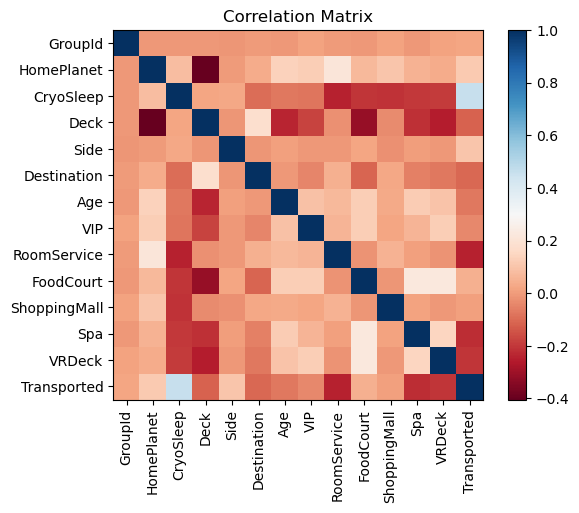

In [22]:
corr = df.corr()
plt.figure()
plt.imshow(corr, cmap='RdBu')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Matrix')
plt.show()

Based on the corellation Matrix it can be seen that there is a high correlation between being Transported and being in CryoSleep

<Axes: xlabel='Transported', ylabel='count'>

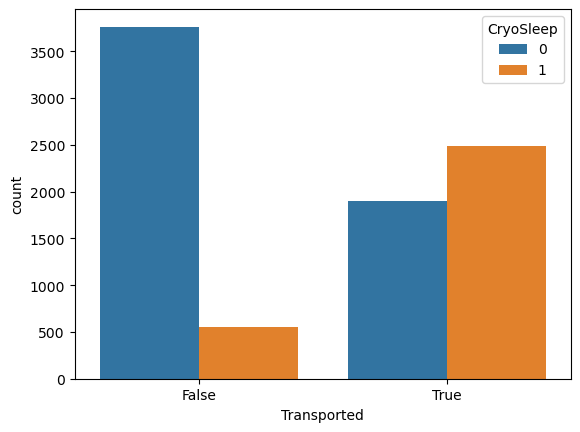

In [23]:
sns.countplot(x = 'Transported', hue = 'CryoSleep', data = df)

In [24]:
# pd.crosstab(df.Transported, df.CryoSleep).plot(kind = 'bar', stacked = True)

The correlation is further enphasized by the bar graph

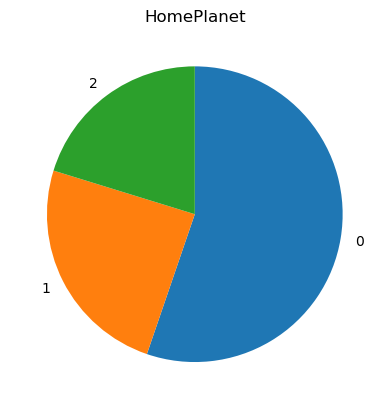

In [25]:
count_HomePlanet=df['HomePlanet'].value_counts()
plt.title('HomePlanet')
plt.pie(count_HomePlanet, labels = count_HomePlanet.index, startangle = 90, counterclock = False);

The majority of individuals are from HomePlanet 0

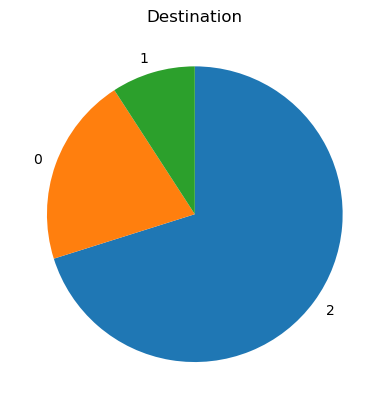

In [26]:
count_destination=df['Destination'].value_counts()
plt.title('Destination')
plt.pie(count_destination, labels = count_destination.index, startangle = 90, counterclock = False);

The majority of individuals are going to destination 2

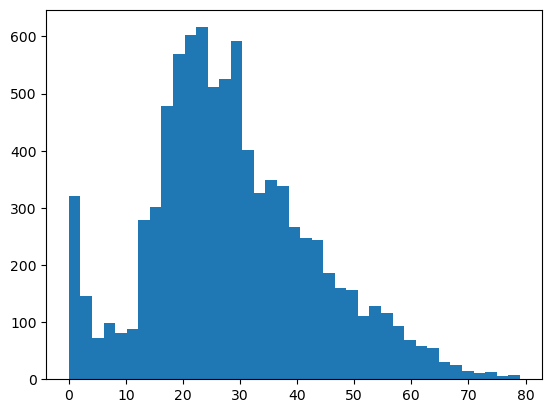

In [27]:
plt.hist(x = df['Age'], bins= 39)
plt.show()

The majority of ages range from 15 to 35

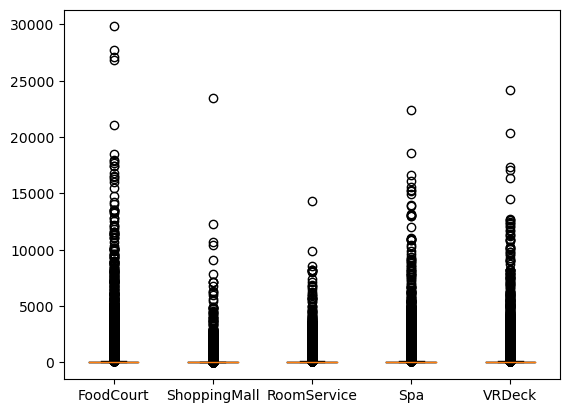

In [28]:
fig = plt.figure()

# Plot the boxplot for each subplot
plt.boxplot([df['FoodCourt'], df['ShoppingMall'], df['RoomService'], df['Spa'], df['VRDeck']], labels=['FoodCourt', 'ShoppingMall', 'RoomService', 'Spa', 'VRDeck'])
plt.show()

<Axes: xlabel='Deck', ylabel='count'>

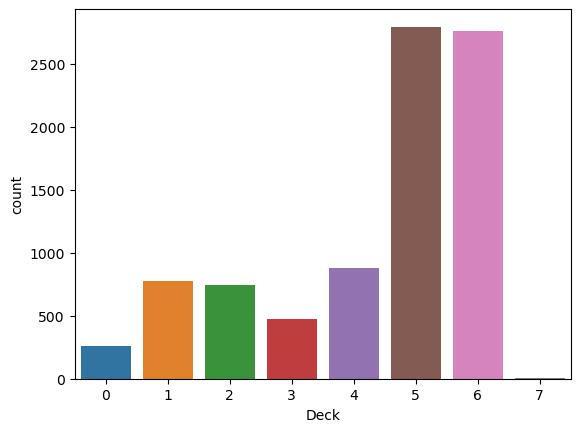

In [29]:
sns.countplot(df, x= 'Deck')

most of the individuals were on deck 5 and 6

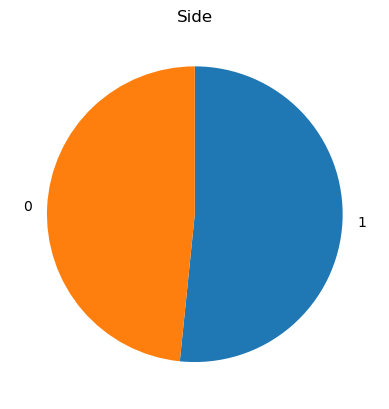

In [30]:
count_side=df['Side'].value_counts()
plt.title('Side')
plt.pie(count_side, labels = count_side.index, startangle = 90, counterclock = False);

individuals are evenly split amoungst both sides of the ship

<Axes: xlabel='VIP', ylabel='count'>

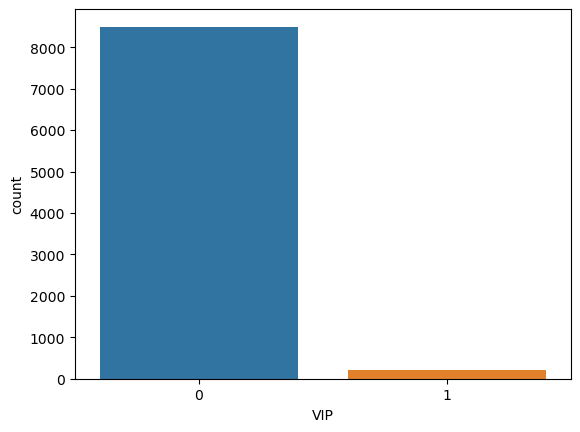

In [ ]:
count_VIP=df['VIP'].value_counts()
plt.title('VIP')
plt.pie(count_VIP, labels = count_VIP.index, startangle = 90, counterclock = False);

In [ ]:
df['VIP'][df['VIP'] == 1].sum()

199

As seen by the graph and the outputted amount there are only 199 VIP individuals on the ship

In [ ]:
print(df['FoodCourt'][df['FoodCourt']>10000].shape)
print(df['ShoppingMall'][df['ShoppingMall']>10000].shape)
print(df['RoomService'][df['RoomService']>10000].shape)
print(df['Spa'][df['Spa']>10000].shape)
print(df['VRDeck'][df['VRDeck']>10000].shape)


(52,)
(4,)
(1,)
(24,)
(28,)


In [ ]:
# df['FoodCourt'][df['FoodCourt']>10000] = 0
# df['ShoppingMall'][df['ShoppingMall']>10000] = 0
# df['RoomService'][df['RoomService']>10000] = 0
# df['Spa'][df['Spa']>10000] = 0
# df['VRDeck'][df['VRDeck']>10000] = 0

I attempted to remove the outliers but it only negatively impacted the accuracy of the models

It is now time to train and test the models to check there accuracies on predicting the data

In [ ]:
transported = df['Transported']
del df['Transported']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, transported,train_size= 0.80, test_size= 0.20, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
print('Linear Regression model')
lr = LogisticRegression(max_iter=10000)
lr.fit(x_train, y_train)
predicted = lr.predict(x_test)
acc = metrics.accuracy_score(y_test,predicted)
print ('accuracy = '+str(acc*100)+'%')
print (metrics.classification_report(y_test,predicted))
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test,predicted))

Linear Regression model
accuracy = 77.11328349626221%
              precision    recall  f1-score   support

       False       0.79      0.74      0.76       861
        True       0.76      0.81      0.78       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739

Confusion Matrix
[[634 227]
 [171 707]]


In [ ]:
print('Linear Regression solver = \'liblinear\'')
lr = LogisticRegression(solver= 'liblinear' , max_iter=10000)
lr.fit(x_train, y_train)
predicted = lr.predict(x_test)
acc = metrics.accuracy_score(y_test,predicted)
print ('accuracy = '+str(acc*100)+'%')
print (metrics.classification_report(y_test,predicted))
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test,predicted))

Linear Regression solver = 'liblinear'
accuracy = 77.17078780908568%
              precision    recall  f1-score   support

       False       0.79      0.74      0.76       861
        True       0.76      0.80      0.78       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739

Confusion Matrix
[[637 224]
 [173 705]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
print('KNN')
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(x_train,y_train)
predicted = knn.predict(x_test)
acc = metrics.accuracy_score(y_test,predicted)
print ('accuracy = '+str(acc*100)+'%')
print (metrics.classification_report(y_test,predicted))
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test,predicted))

KNN
accuracy = 76.76825761932145%
              precision    recall  f1-score   support

       False       0.82      0.69      0.74       861
        True       0.73      0.85      0.79       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739

Confusion Matrix
[[590 271]
 [133 745]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
print("ID3")
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(x_train, y_train)
predicted = clf.predict(x_test)
acc = metrics.accuracy_score(y_test,predicted)
print ('accuracy = '+str(acc*100)+'%')
print (metrics.classification_report(y_test,predicted))
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test,predicted))

ID3
accuracy = 74.81311098332375%
              precision    recall  f1-score   support

       False       0.76      0.72      0.74       861
        True       0.74      0.77      0.76       878

    accuracy                           0.75      1739
   macro avg       0.75      0.75      0.75      1739
weighted avg       0.75      0.75      0.75      1739

Confusion Matrix
[[624 237]
 [201 677]]


In [ ]:
from sklearn import naive_bayes
print('Naive Bayes')
clfr = naive_bayes.MultinomialNB()
clfr.fit(x_train, y_train)
predicted = clfr.predict(x_test)
acc = metrics.accuracy_score(y_test,predicted)
print ('accuracy = '+str(acc*100)+'%')
print (metrics.classification_report(y_test,predicted))
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test,predicted))

Naive Bayes
accuracy = 74.98562392179413%
              precision    recall  f1-score   support

       False       0.86      0.59      0.70       861
        True       0.69      0.91      0.79       878

    accuracy                           0.75      1739
   macro avg       0.78      0.75      0.74      1739
weighted avg       0.78      0.75      0.74      1739

Confusion Matrix
[[506 355]
 [ 80 798]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
print("Random Forest")
rf = RandomForestClassifier(criterion='log_loss', n_estimators=300)
rf.fit(x_train, y_train)
predicted = rf.predict(x_test)
acc = metrics.accuracy_score(y_test,predicted)
print ('accuracy = '+str(acc*100)+'%')
print (metrics.classification_report(y_test,predicted))
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test,predicted))

Random Forest
accuracy = 79.35595169637722%
              precision    recall  f1-score   support

       False       0.78      0.81      0.79       861
        True       0.80      0.78      0.79       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

Confusion Matrix
[[694 167]
 [192 686]]


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
predicted = clf.predict(x_test)
acc = metrics.accuracy_score(y_test,predicted)
print ('accuracy = '+str(acc*100)+'%')
print (metrics.classification_report(y_test,predicted))
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test,predicted))


accuracy = 76.99827487061529%
              precision    recall  f1-score   support

       False       0.80      0.72      0.76       861
        True       0.75      0.82      0.78       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739

Confusion Matrix
[[618 243]
 [157 721]]


Amoung all the Models trained and tested the highest accuracy one was the Random Forests model with an accuracy of 79.356%